In [1]:
import os
from dotenv import load_dotenv
from binance.spot import Spot
import warnings

warnings.filterwarnings("ignore")

load_dotenv()

API = os.getenv('API_TOKEN')
API_NAME = os.getenv('TOKEN_NAME')


client = Spot()

bnb = client.klines("BNBUSDT", "1h")

client = Spot(api_key=API_NAME, api_secret=API)

params = {
    'symbol': 'BTCUSDT',
    'side': 'SELL',
    'type': 'LIMIT',
    'timeInForce': 'GTC',
    'quantity': 0.002,
    'price': 9500
}


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

bnb_df = pd.DataFrame(bnb, columns=['time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset', 'taker_buy_quote_asset', 'ignore'])

In [3]:
import functools

round_2 = functools.partial(round, ndigits=2)

bnb_df['close'] = (bnb_df['close'].astype(float)).apply(round_2)

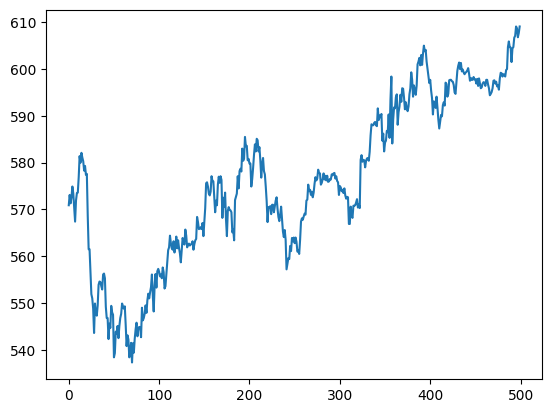

In [4]:
plt.plot(bnb_df['close'])

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

def hyperparams_selection(series):
    p = q = range(0, 3)
    d = range(0, 2)
    season = 12

    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], season) for x in list(itertools.product(p, d, q))]

    best_aic = float("inf")
    best_params = None

    for param in pdq:
        print(param)
        for seasonal_param in seasonal_pdq:
            try:
                model = SARIMAX(series, exog=None, order=param, seasonal_order=seasonal_param)
                results = model.fit(disp=False)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = (param, seasonal_param)
            except:
                continue
    
    print("Best order: ", best_params[0])
    print("Best seasonal order: ", best_params[1])
    
    return best_params

In [ ]:
hyperparams_selection(bnb_df['close'])

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 1, 0)


In [ ]:
bnb_df['time'] = bnb_df['time'].apply(lambda x: x//3600000)
bnb_df['time'] = pd.to_datetime(bnb_df['time'], unit='h')

In [ ]:
bnb_df = bnb_df.set_index('time')

In [21]:
bnb_df

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset,taker_buy_quote_asset,ignore
time,,,,,,,,,,,
2024-09-30 16:00:00,571.20000000,574.20000000,569.40000000,570.9,18620.47600000,1727715599999,10642240.47390000,35577,6889.21500000,3939479.44140000,0
2024-09-30 17:00:00,571.00000000,573.20000000,569.90000000,573.1,6805.16500000,1727719199999,3887456.40190000,23598,4006.82700000,2289016.65880000,0
2024-09-30 18:00:00,573.10000000,573.40000000,568.00000000,571.3,11424.89400000,1727722799999,6513201.16530000,36362,5349.64500000,3050853.68530000,0
2024-09-30 19:00:00,571.20000000,573.40000000,570.80000000,572.6,6291.97600000,1727726399999,3597927.80020000,21260,2970.21800000,1698735.52440000,0
2024-09-30 20:00:00,572.70000000,575.40000000,572.50000000,574.9,5299.84200000,1727729999999,3043989.43830000,17493,2543.64700000,1460843.31970000,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-21 07:00:00,607.20000000,609.90000000,606.60000000,609.1,13984.02300000,1729497599999,8510605.38390000,31887,7353.76200000,4476059.27630000,0
2024-10-21 08:00:00,609.10000000,611.80000000,607.10000000,608.7,24643.22400000,1729501199999,15026726.22300000,49161,13246.82400000,8078330.57350000,0
2024-10-21 09:00:00,608.70000000,609.40000000,604.50000000,606.8,12179.02200000,1729504799999,7390359.51170000,31265,5151.56400000,3126654.72230000,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


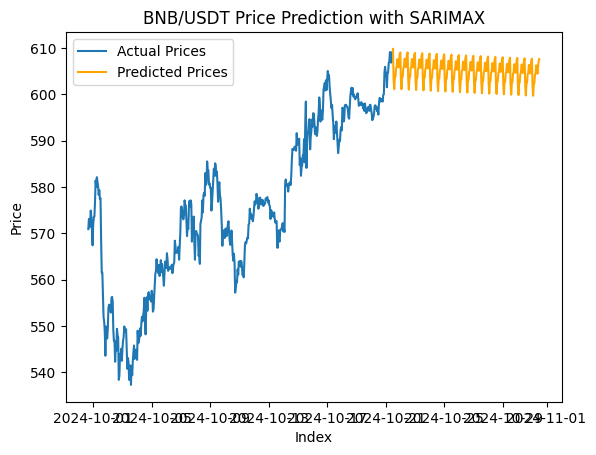

In [23]:
# Fit the SARIMAX model
best_params = ((0, 0, 2), (2, 0, 0, 12))
model = SARIMAX(bnb_df['close'], order=best_params[0], seasonal_order=best_params[1]).fit(disp=False)

y_pred = model.get_prediction(start=len(bnb_df['close']), end=len(bnb_df['close']) + 240)

start_time = pd.Timestamp('2024-10-21 12:00:00')
frequency = 'H'  # Assuming 1-hour frequency for the prediction
pred_index = pd.date_range(start=start_time, periods=241, freq=frequency)

plt.plot(bnb_df.index, bnb_df['close'], label='Actual Prices')
plt.plot(pred_index, y_pred.predicted_mean, label='Predicted Prices', color='orange')

plt.title('BNB/USDT Price Prediction with SARIMAX')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

plt.show()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(bnb_df['close'], model='add')

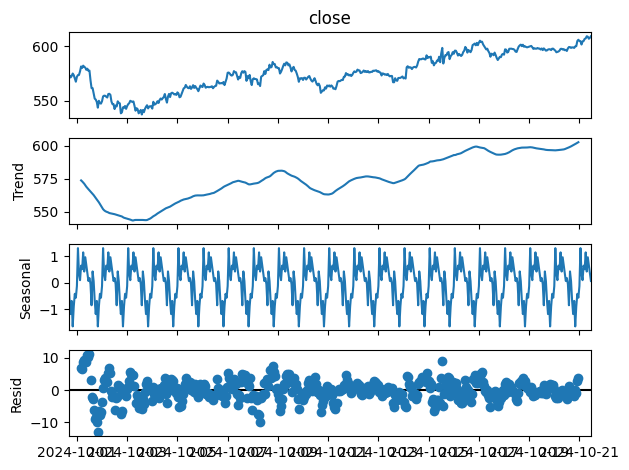

In [28]:
decomposed.plot()

plt.show()

In [30]:
resid = decomposed.resid[6:-6]
season = decomposed.seasonal[6:-6]
trend = decomposed.trend[6:-6]

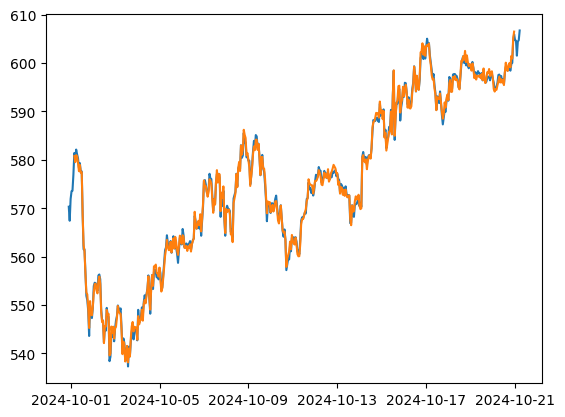

In [32]:
plt.plot(bnb_df['close'][6:-6])
plt.plot(resid + trend)

1.056947502840457e-17


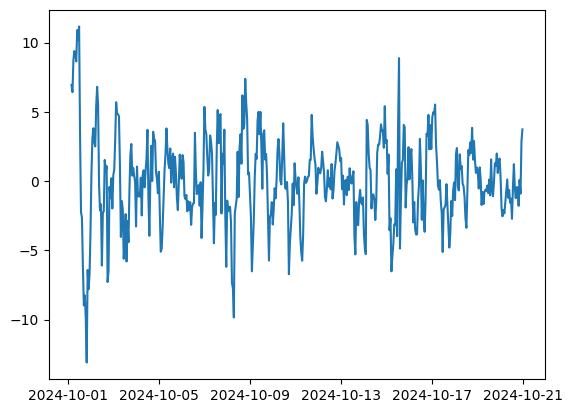

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

new_bnb = (resid + trend)[6:-6]

print(adfuller(resid[6:-6])[1])

plt.plot(resid[6:-6])

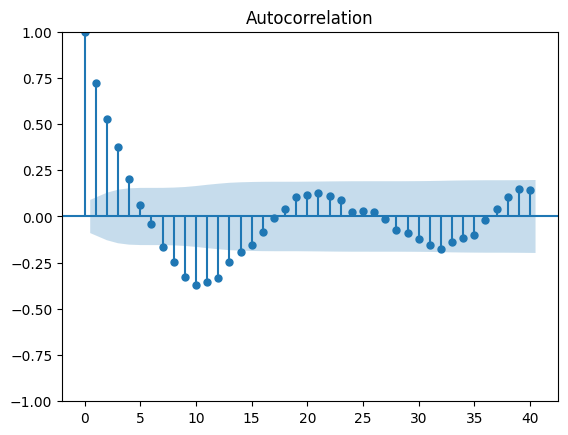

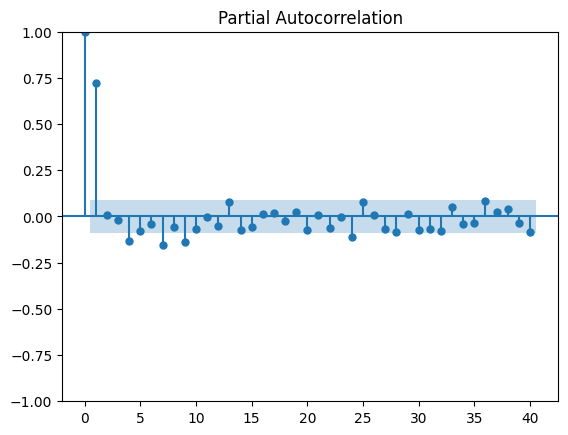

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(resid[6:-6], lags=40)
plot_pacf(resid[6:-6], lags=40)
plt.show()

In [42]:
model = ARIMA(resid[6:-6], order=(4, 0, 2)).fit()

y_hat = model.get_forecast(steps=24)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
range(len(resid[6:-6], len(resid[6:-6] + 25)))

2024-10-21 00:00:00    2.805430
2024-10-21 01:00:00    2.461145
2024-10-21 02:00:00    2.035264
2024-10-21 03:00:00    1.539682
2024-10-21 04:00:00    1.089477
2024-10-21 05:00:00    0.664955
2024-10-21 06:00:00    0.282051
2024-10-21 07:00:00   -0.046992
2024-10-21 08:00:00   -0.318887
2024-10-21 09:00:00   -0.531556
2024-10-21 10:00:00   -0.685936
2024-10-21 11:00:00   -0.785450
2024-10-21 12:00:00   -0.835183
2024-10-21 13:00:00   -0.841485
2024-10-21 14:00:00   -0.811478
2024-10-21 15:00:00   -0.752611
2024-10-21 16:00:00   -0.672295
2024-10-21 17:00:00   -0.577592
2024-10-21 18:00:00   -0.474974
2024-10-21 19:00:00   -0.370147
2024-10-21 20:00:00   -0.267943
2024-10-21 21:00:00   -0.172260
2024-10-21 22:00:00   -0.086056
2024-10-21 23:00:00   -0.011381
Freq: H, Name: predicted_mean, dtype: float64

In [53]:
start_time = pd.Timestamp('2024-10-21 1:00:00')
frequency = 'H'  # Assuming 1-hour frequency for the prediction
pred_index = pd.date_range(start=start_time, periods=24, freq=frequency)

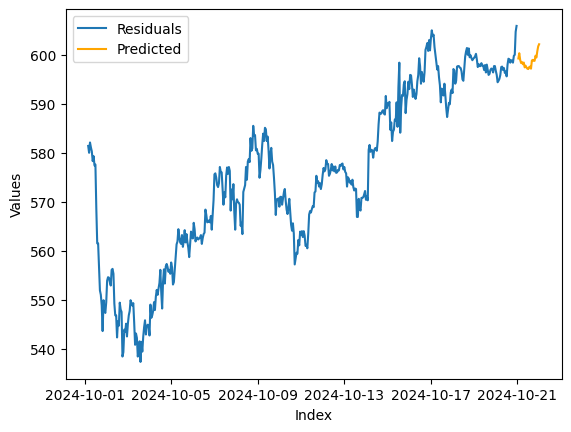

In [66]:
y_hat_range = list(range(len(resid[6:-6]), len(resid[6:-6]) + 24))

# Plot the residuals
plt.plot(resid[6:-6] + trend + season, label='Residuals')

# Plot the predicted values (y_hat) starting from the correct index
plt.plot(pred_index, y_hat.predicted_mean + (trend[-30:-6] + season[-30:-6]).values, label='Predicted', color='orange')

# Add labels and a legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

plt.show()

array([596.45179984, 597.8641902 , 596.94368581, 596.78984809,
       597.43336234, 597.40825818, 598.14065401, 597.48471651,
       598.10315401, 597.94075818, 597.85804984, 597.87877901,
       598.32700818, 598.44836234, 597.98107068, 599.60336234,
       599.63752901, 599.34044568, 599.25159151, 600.18596651,
       599.71263318, 600.90711234, 601.81825818, 602.16857068])

2024-10-21 00:00:00    599.257230
2024-10-21 01:00:00    600.325336
2024-10-21 02:00:00    598.978950
2024-10-21 03:00:00    598.329530
2024-10-21 04:00:00    598.522840
2024-10-21 05:00:00    598.073213
2024-10-21 06:00:00    598.422705
2024-10-21 07:00:00    597.437725
2024-10-21 08:00:00    597.784267
2024-10-21 09:00:00    597.409202
2024-10-21 10:00:00    597.172113
2024-10-21 11:00:00    597.093329
2024-10-21 12:00:00    597.491826
2024-10-21 13:00:00    597.606878
2024-10-21 14:00:00    597.169593
2024-10-21 15:00:00    598.850751
2024-10-21 16:00:00    598.965234
2024-10-21 17:00:00    598.762853
2024-10-21 18:00:00    598.776618
2024-10-21 19:00:00    599.815820
2024-10-21 20:00:00    599.444690
2024-10-21 21:00:00    600.734852
2024-10-21 22:00:00    601.732202
2024-10-21 23:00:00    602.157189
Freq: H, Name: predicted_mean, dtype: float64